In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns #statistical graphics in python
import matplotlib.pyplot as plt #creating statistic animations and visualisation
from sklearn.feature_extraction.text import TfidfVectorizer #how important a document is relative to collection of documents
from sklearn.preprocessing import LabelEncoder #converting catogorised variables to numerical from
from sklearn.svm import LinearSVC #it returns a best fit hyperplane that divides or catogorizes your data
from sklearn.model_selection import train_test_split # train test and split the data
from sklearn.metrics import accuracy_score,classification_report #to find the accuracy score and classification report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
tr_data= pd.read_csv("/content/drive/MyDrive/train_data.txt",sep=':::',names=['ID','TITLE','GENRE','DESCRIPTION'])
tr_data.head()

te_data= pd.read_csv("/content/drive/MyDrive/test_data.txt",sep=':::',names=['ID','TITLE','GENRE','DESCRIPTION'])
te_data.head()

te_sol= pd.read_csv("/content/drive/MyDrive/test_data_solution.txt",sep=':::',names=['ID','TITLE','GENRE','DESCRIPTION'])
te_sol.head()

<ipython-input-4-235c103122a3>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  tr_data= pd.read_csv("/content/drive/MyDrive/train_data.txt",sep=':::',names=['ID','TITLE','GENRE','DESCRIPTION'])
<ipython-input-4-235c103122a3>:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  te_data= pd.read_csv("/content/drive/MyDrive/test_data.txt",sep=':::',names=['ID','TITLE','GENRE','DESCRIPTION'])
<ipython-input-4-235c103122a3>:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you ca

,ID,TITLE,GENRE,DESCRIPTION
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


from matplotlib import pyplot as plt
_df_0['ID'].plot(kind='hist', bins=20, title='ID')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('TITLE').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('GENRE').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('DESCRIPTION').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['ID']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'ID'}, axis=1)
              .sort_values('ID', ascending=True))
  xs = counted['ID']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('ID', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('TITLE')):
  _plot_series(series, series_name, i)
  fig.legend(title='TITLE', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ID')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['ID']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'ID'}, axis=1)
              .sort_values('ID', ascending=True))
  xs = counted['ID']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('ID', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('GENRE')):
  _plot_series(series, series_name, i)
  fig.legend(title='GENRE', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ID')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['ID']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'ID'}, axis=1)
              .sort_values('ID', ascending=True))
  xs = counted['ID']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('ID', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('DESCRIPTION')):
  _plot_series(series, series_name, i)
  fig.legend(title='DESCRIPTION', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ID')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_7['ID'].plot(kind='line', figsize=(8, 4), title='ID')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['GENRE'].value_counts()
    for x_label, grp in _df_8.groupby('TITLE')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('TITLE')
_ = plt.ylabel('GENRE')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['DESCRIPTION'].value_counts()
    for x_label, grp in _df_9.groupby('GENRE')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('GENRE')
_ = plt.ylabel('DESCRIPTION')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_10['TITLE'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_10, x='ID', y='TITLE', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_11['GENRE'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_11, x='ID', y='GENRE', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_12['DESCRIPTION'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_12, x='ID', y='DESCRIPTION', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

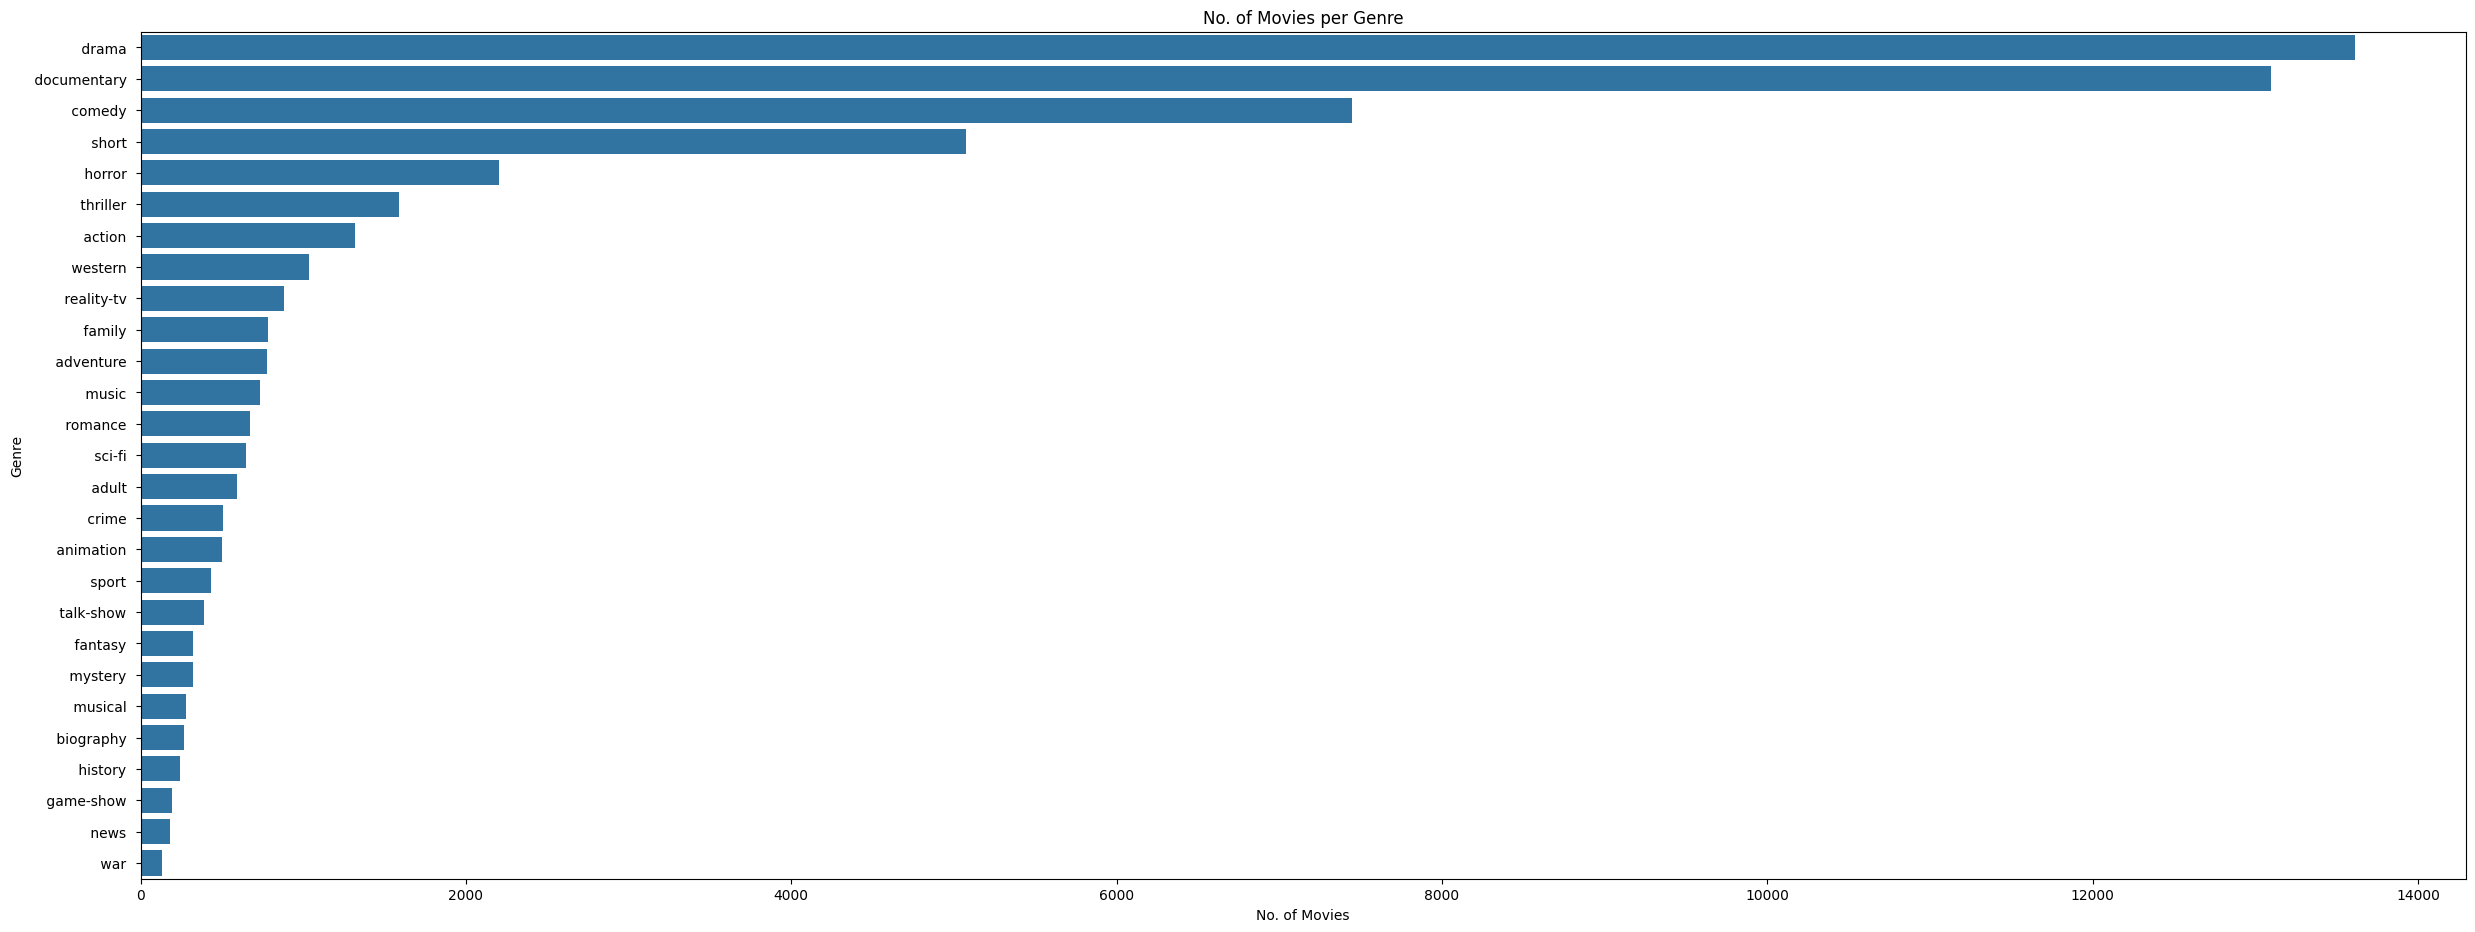

In [ ]:
#graph count
plt.figure(figsize=(30,11))#image  size
sns.countplot(y=tr_data['GENRE'],order=tr_data['GENRE'].value_counts().index) #it counts the no of genres
plt.title('No. of Movies per Genre') # displays the title
plt.xlabel('No. of Movies') #displays the label at x column
plt.ylabel('Genre') #displays label at y column
plt.show() #shows the graph

In [ ]:
#initialising train and test data
tr_data['DESCRIPTION'].fillna("",inplace=True)#its fills the not available data with non not available data(lets assume it fills garbage values)
te_data['DESCRIPTION'].fillna("",inplace=True)#it fills the not availbale data with non not available data(lets assume it fills  a garbage value)
tv=TfidfVectorizer(stop_words='english',max_features=100000)
X_train=tv.fit_transform(tr_data['DESCRIPTION'])
X_test=tv.transform(te_data['DESCRIPTION'])

l_en=LabelEncoder()
Y_train=l_en.fit_transform(tr_data['GENRE'])
Y_test=l_en.transform(te_sol['GENRE'])


In [ ]:
#checking accuracy score
X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train, Y_train, test_size=0.30, random_state=52)

clf=LinearSVC()
clf.fit(X_train_sub,y_train_sub)

Y_val_pred=clf.predict(X_val)


print("Validation Accuracy:",accuracy_score(y_val,Y_val_pred))
print("Validation Classification Report :\n",classification_report(y_val,Y_val_pred))

Validation Accuracy: 0.5669843221641562
Validation Classification Report :
               precision    recall  f1-score   support

           0       0.40      0.27      0.32       397
           1       0.69      0.36      0.47       170
           2       0.45      0.17      0.25       221
           3       0.45      0.09      0.15       163
           4       0.00      0.00      0.00        91
           5       0.52      0.57      0.55      2278
           6       0.24      0.05      0.09       151
           7       0.67      0.82      0.73      3888
           8       0.54      0.71      0.62      4086
           9       0.41      0.12      0.18       264
          10       0.19      0.03      0.06        90
          11       0.80      0.67      0.73        54
          12       0.25      0.01      0.02        81
          13       0.67      0.61      0.64       665
          14       0.55      0.46      0.50       213
          15       0.25      0.03      0.06        91
     

In [ ]:
#prediction
def prediction(description):
    t_v1 = tv.transform([description])
    ans =clf.predict(t_v1)
    return l_en.inverse_transform(ans)[0]
description= input("enter a movie name to predict the genre :")
print(prediction(description))

enter a movie name to predict the genre :home alone
 drama 
